# Das Variationsprinzip


In [103]:
import os
import matplotlib

# For static builds: force non-interactive backend BEFORE importing pyplot
if os.environ.get("SPHINX_BUILD", "0") == "1":
    matplotlib.use("Agg")

import numpy as np
import matplotlib.pyplot as plt

# rcParams
matplotlib.rcParams['axes.linewidth'] = 2.0
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['figure.figsize'] = [8, 6]
matplotlib.rcParams['animation.embed_limit'] = 1000
matplotlib.rcParams['text.usetex'] = False
# If you want Times, use serif family:
matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams["font.serif"] = ["Times New Roman", "Times"]
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

from ipywidgets import interact
import ipywidgets as widgets



In [104]:
from scipy import constants

tocm = constants.physical_constants["hartree-inverse meter relationship"][0] / 100.0
elmass = constants.m_e / constants.m_u
auofmass = 1.0 / elmass
mH = 1.00784 * auofmass


Wir haben in der **Physikalischen Chemie I** gesehen, dass sich die Schrödingergleichung nur für wenige ideale Systeme exakt lösen lässt. Dies waren z. B. das *Teilchen im Kasten*, der *harmonische Oszillator*, der *starre Rotor* und das *Wasserstoffatom*.  

Diese analytisch lösbaren Beispiele haben uns gelehrt, wie sich Energiequantisierung, Wellenfunktionen und Erwartungswerte aus der Grundgleichung der Quantenmechanik ergeben. Doch solche exakt analytisch lösbaren Fälle sind eher seltene Ausnahmen!  

Der weitaus größte Teil aller physikalisch und chemisch interessanten Systeme entzieht sich einer exakten analytischen Behandlung. Bereits das einfachste Molekül ($\mathrm{H_2}$) mit mehr als einem Elektron führt auf eine elektronische Schrödingergleichung, die sich nicht mehr exakt lösen lässt.  

Damit stellt sich die zentrale Frage: **Wie kann man dennoch zuverlässige Näherungen für Energien und Wellenfunktionen molekularer Systeme gewinnen?**  

Genau mit dieser Frage befasst sich die *Quantenchemie*. Ihr Ziel ist es, systematische und möglichst effiziente Näherungsverfahren zu entwickeln, die die Lösung der molekularen Schrödingergleichung ermöglichen. Das **Variationsprinzip**, das wir in diesem Kapitel kennenlernen werden, bildet einen der grundlegendsten theoretischen Pfeiler der Quantenchemie. Es liefert den konzeptionellen und mathematischen Rahmen, in dem sich Näherungen entwickeln und systematisch verbessern lassen.


## Idee des Variationsverfahrens



Das Variationsprinzip beruht auf einem einfachen, aber äußerst mächtigen Gedanken:

Man konstruiert eine analytische Form für die angenäherte Wellenfunktion, die von einigen Parametern abhängt. Diese Parameter werden dann so variiert, dass der Energieerwartungswert den man mit Hilfe der genäherten Wellenfunktion berechnet, minimal wird.  

Betrachten wir nun ein System mit dem Hamiltonoperator $\hat{H}$. Wir nehmen an, dass das System einen Grundzustand mit der Energie $E_0$ besitzt. Die entsprechende (unbekannte) normierte exakte Wellenfunktion bezeichnen wir als $\psi_0$. Die exakte Wellenfunktion ist eine Eigenfunktion des Hamiltonoperators:

$$
\hat{H}\psi_0 = E_0 \psi_0
$$

Äquivalent dazu ist der Erwartungswert der Energie im Grundzustand ebenfalls gleich $E_0$. Es gilt also:

$$
E_{0} = \int dV\, \psi_{0}^{*}\,\hat{H}\,\psi_{0}
$$

mit der **Normierungsbedingung**

$$
\int dV\, \psi_{0}^{*}\psi_{0} = 1 \, .
$$

Betrachten wir nun eine **beliebige normierte Testwellenfunktion** $\psi_{\text{test}}$, die die Randbedingungen des Problems erfüllt. Das bedeutet, dass $\psi_{\text{test}}$ im gleichen Funktionenraum liegt und dieselben physikalischen Einschränkungen wie die exakte (uns unbekannte) Wellenfunktion $\psi_0$ erfüllt.  

Mit Hilfe dieser Testfunktion können wir nun auch den entsprechenden **Energieerwartungswert**

$$
E_{\text{test}} = \int dV\, \psi_{\text{test}}^{*}\,\hat{H}\,\psi_{\text{test}}
$$

berechnen.  

Das Variationsprinzip besagt nun, dass dieser Erwartungswert stets **größer oder gleich der exakten Grundzustandsenergie** ist. 

Für jede beliebige Test-Wellenfunktion gilt also die folgende Beziehung (Variationssatz): 

$$ \require{color}
\fcolorbox{red}{#f2d5d3}{$  E[\psi_{test}]=\int d\tau \psi_{test}^{*}\hat{H}\psi_{test}\ge E_{0}  $}$$

mit der Normierungsbedingung:

$$\fcolorbox{red}{#f2d5d3}{$\int d\tau  \psi_{test}^{*}\psi_{test} = 1$}$$ 



## Beweis des Variationsprinzips



Seien $\psi _n$ die **exakten** Eigenfunktionen des Hamiltonoperators:

$$\hat{H}\psi_{n}=E_{n}\psi_{n}\quad n=0,1,2\cdots.  $$

Die Eigenwerte können immer nach der Größe angeordnet werden. Also nehmen wir an, dass die Eigenwerte wie folgt sortiert sind:

$$ E_{0}\le E_{1}\le E_{2}\le\cdots\le E_{i}\le\cdots. $$

Die mathematischen Eigenschaften der hermiteschen Operatoren garantieren, dass die exakten Eigenfunktionen eine **vollständige orthonormierte** Basis bilden. 

Dies bedeutet, dass eine beliebige Test-Wellenfunktion, die die gleichen Randbedingungen erfüllt, exakt in der Basis zerlegt werden kann. 


Für eine beliebige Test-Wellenfunktion exisitiert also eine **exakte** Basis-Zerlegung in der Form: 

$$ \psi_{test}=\sum_{i}c_{i}\psi_{i} $$

wobei $c_i$ (unbekannte) Entwicklungskoeffizienten. Aus der Forderung, dass die Test-Wellenfunktion normiert sein muss, folgt:

$$ \int d\tau \psi_{test}^{*}\psi_{test}=1\rightarrow\sum_{i}\sum_{j}c_{i}^{*}c_{j}\left[\int d \tau \psi_{i}^{*}\psi_{j}\right]=1 $$

Dies ist eine **Nebenbedingung**, die die Entwicklungskoeffzienten $c_i$ erfüllen müssen. 

Wegen der Orthonormalität der exakten Eigenfunktionen des hermiteschen Operators $\hat H$ gilt aber auch:

$$ \int d\tau \psi_{i}^{*}\psi_{j}=\delta_{ij} $$

Damit vereinfacht sich die Normierungsbedingung auf:

$$ \sum_{i}|c_{i}^{2}|=1. $$

Für den Energie-Erwartungswert der Test-Wellenfunktion bekommen wir: 

$$ E[\psi_{test}]=\int d\tau \psi_{test}^{*}\hat{H}\psi_{test}=\sum_{i}\sum_{j}c_{i}^{*}c_{j}\int d\tau \psi_{i}^{*}\hat{H}\psi_{j}.  $$

Wir nutzen nun wieder die Annahme, dass $\psi_i $ und $\psi_j$ exakte orthonormierte Eigenfunktionen sind,

 $$ \hat{H}\psi_{j}=E_{j}\psi_{j} $$ 



Den Erwartungswert können wir damit in der folgenden Form schreiben:

$$ E[\psi_{test}]=\sum_{i}\sum_{j}c_{i}^{*}c_{j}E_{j}\int d\tau \psi_{i}^{*}\psi_{j} $$ 

Nun kommt wieder die Orthonormierung ins Spiel und wir erhalten:

$$ E[\psi_{test}]=\sum_{i}|c_{i}^{2}|E_{i}. $$ 

Da wir die Eigenwerte der Größe nach sortiert haben gilt ferner die folgende Ungleichheit:

$$ E[\psi_{test}]=|c_{0}^{2}|E_{0}+|c_{1}^{2}|E_{1}+|c_{2}^{2}|E_{2}+\cdots\ge|c_{0}^{2}|E_{0}+|c_{1}^{2}|E_{0}+|c_{2}^{2}|E_{0}+\cdots $$ 

$$ E[\psi_{test}]\ge E_{0}\left(|c_{0}^{2}|+|c_{1}^{2}|+|c_{2}^{2}|+\cdots\right). $$

Da aber die Wellenfunktion normiert ist gilt auch,

$$ \sum_{i}|c_{i}^{2}|=1 $$ 

Damit haben wir gezeigt, dass die Energie der Test-Wellenfunktion immer größer oder gleich als die exakte Grundzustandsenergie ist. Für jede **beliebige** Test-Wellenfunktion gilt also die folgende Relation:

$$ \require{color}\fcolorbox{red}{#f2d5d3}{$E[\psi_{test}]\ge E_{0}$} $$


## Parametrisierung des Variationsansatzes

Die Bedeutung des Variationsprinzips liegt darin, dass uns **jede beliebige normierte Wellenfunktion** bereits eine obere Schranke für die exakte Grundzustandsenergie liefert. Damit verwandelt man die Lösung der Schrödingergleichung in ein **Optimierungsproblem**, bei dem die bestmögliche Näherung durch Minimierung des Energieerwartungswerts gefunden werden kann.  

Darüber hinaus bietet uns das Variationsprinzip die Möglichkeit, sowohl die Energie als auch die Wellenfunktion **systematisch** zu verbessern – etwa durch Erweiterung des Variationsraums. Auf diese Weise lässt sich die exakte Lösung schrittweise immer genauer annähern.  

Das Variationsprinzip ist daher vielleicht die **wichtigste Näherungsmethode** der Quantenchemie: eine große Zahl moderner quantenchemischer Verfahren beruht unmittelbar auf diesem fundamentalen Konzept.

### Wie funktionieren variationelle Methoden der Quantenchemie?

Man konstruiert einen **physikalisch motivierten Ansatz** für die Wellenfunktion, der einige **freie Variationsparameter** enthält:

$$
\psi(\mathbf{x}) \;\longrightarrow\; \psi_{\text{test}}(\mathbf{x}; \beta_{1}, \beta_{2}, \ldots, \beta_{n})
$$

Dadurch beschränkt man den unendlichdimensionalen Raum aller denkbaren Wellenfunktionen auf eine **parametrisierte Familie** von Funktionen.  

Die "beste" Wellenfunktion innerhalb dieses Variationsraums erhält man, indem man den **Energieerwartungswert**

$$
E[\psi_{\text{test}}] = 
\int d\tau \psi_{\text{test}}  \hat{H}  \psi_{\text{test}} 
$$

**mit Bezug auf die Variationsparameter** $\beta_{1}, \beta_{2}, \ldots, \beta_{n}$ **minimiert** unter der **Nebenbedingung**, dass der variationelle Ansatz normiert ist:  

$$
\int d\tau \psi_{\text{test}}^*   \psi_{\text{test}}  = 1
$$

Auf diese Weise wird das Variationsprinzip zu einem **Optimierungsproblem**: je besser der gewählte Ansatz den physikalischen Eigenschaften des Systems umfasst, desto näher liegt die minimale Energie an der exakten Grundzustandsenergie.

## Beispiel: Teilchen im $V(x) = \alpha x^4$ Potential

Das Variationsverfahren soll im Folgenden an einem einfachen Beispiel veranschaulicht werden. Wir betrachten ein Teilchen in einem **anharmonischen Potential** der Form

$$
V(x) = \alpha x^{4}, \quad \alpha > 0 .
$$

Die zugehörige **stationäre Schrödingergleichung** lautet

$$
-\frac{\hbar^{2}}{2m}\,\frac{d^{2}\psi}{dx^{2}} + \alpha x^{4}\psi = E\psi ,
$$

und kann **nicht analytisch exakt gelöst** werden. Dieses System eignet sich daher  gut, um einige Merkmale des Variationsverfahrens zu demonstrieren.


### Wahl des variationellen Ansatzes

Die Wahl der Testwellenfunktion ist in der Regel **physikalisch motiviert**.  
Aufgrund der **geraden Symmetrie** des Potentials erwarten wir, dass der Grundzustand durch eine **gerade Funktion** beschrieben wird, die zudem im Unendlichen verschwindet, um die **Normierbarkeit** zu garantieren.  

Das Problem erinnert an den **harmonischen Oszillator**, dessen Lösung wir bereits kennen.  
Daher bietet es sich an, als Ansatz eine **Gaussfunktion** zu wählen, deren (inverse) Breite $\beta$ als **Variationsparameter** dient:

$$
\psi_{\text{test}}(x; \beta) = N\,\exp(-\beta x^{2}) \, .
$$

Wir normieren diesen Ansatz nun symbolisch mit Hilfe des Sympy-Moduls in Python.

Der Ansatz muss zunächst **normiert** werden. Es gilt:

$$
\int_{-\infty}^{\infty} \psi_{\text{test}}^{*}(x)\,\psi_{\text{test}}(x)\,dx = 1
\;\;\Rightarrow\;\;
N^{2} \int_{-\infty}^{\infty} e^{-2\beta x^{2}}\,dx = 1 .
$$

Dazu berechnen wir das **Gauss-Integral**:

$$
\int_{-\infty}^{\infty} e^{-2\beta x^{2}}\,dx
= \sqrt{\frac{\pi}{2\beta}} \, .
$$

Damit ergibt sich die **normierte Testwellenfunktion** zu

$$
\psi_{\text{test}}(x)
= \left(\frac{2\beta}{\pi}\right)^{\!1/4}
\exp(-\beta x^{2}) \, .
$$

In [105]:
from sympy import symbols, exp, integrate, oo, sqrt, pi

x, beta = symbols('x beta', real=True, positive=True)
psi = exp(-beta * x**2)
norm = integrate(psi**2, (x, -oo, oo))
N = 1/sqrt(norm.simplify())
display(N)

2**(1/4)*beta**(1/4)/pi**(1/4)

<IPython.core.display.Javascript object>


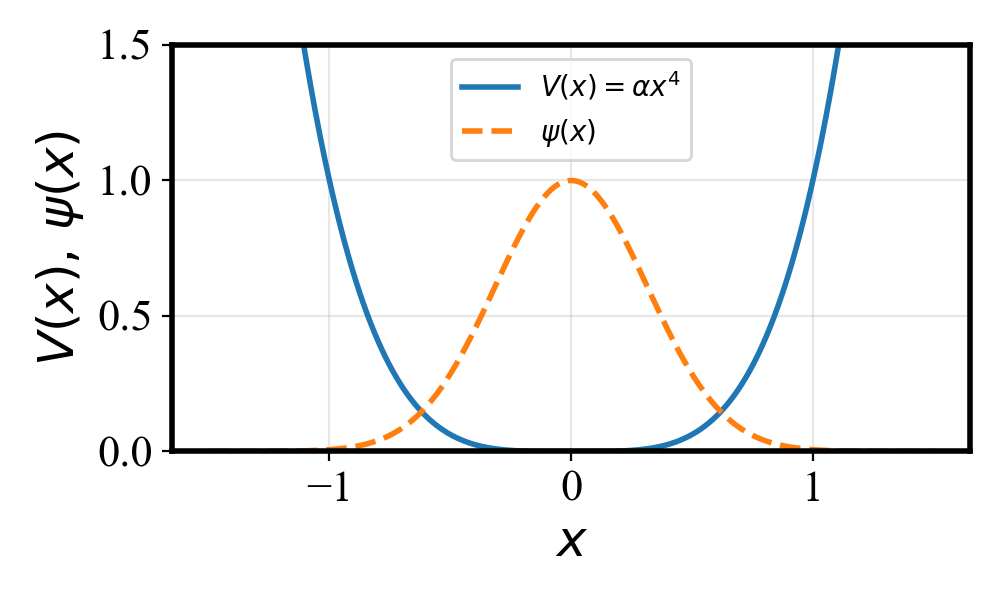

FloatLogSlider(value=5.0, description='β', max=2.0, min=-2.0, step=0.01)

In [106]:
%matplotlib notebook
from sympy import symbols, exp, lambdify
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as w

x, alpha, beta = symbols('x alpha beta', real=True, positive=True)
V   = alpha * x**4
psi = exp(-beta * x**2)

V_fn   = lambdify((alpha, x), V,   'numpy')
psi_fn = lambdify((beta,  x), psi, 'numpy')

xg = np.linspace(-1.5, 1.5, 600)
Vg = V_fn(1.0, xg)

fig, ax = plt.subplots(figsize=(5,3))
(lineV,)  = ax.plot(xg, Vg,  lw=2.0, label=r'$V(x)=\alpha x^4$')
(linePsi,)  = ax.plot(xg, 
                      psi_fn(5.0, xg), 
                      lw=2.0, 
                      label=r'$\psi(x)$', 
                      linestyle='--')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$V(x),\,\psi(x)$')
ax.grid(True, alpha=0.3)
ax.set_ylim(0.0,1.5)
ax.legend();
fig.tight_layout()

beta = w.FloatLogSlider(value=5.0, 
                        base=10, 
                        min=-2, 
                        max=2, 
                        step=0.01, 
                        description='β', 
                        continuous_update=True)

def update(change):
    y = psi_fn(beta.value, xg)
    linePsi.set_ydata(y)
    fig.canvas.draw_idle()

beta.observe(update, names='value')
display(beta)

In [107]:
from sympy import symbols, exp, diff, simplify, integrate, oo
x, alpha, beta, hbar, m = symbols('x alpha beta hbar m', real=True, positive=True)

V = alpha * x**4
psi = exp(-beta * x**2)

norm = integrate(psi**2, (x, -oo, oo))

def T_psi(psi):
    return simplify(-(hbar**2/(2*m)) * diff(psi, x, 2))

def V_psi(V, psi):
    return simplify(V * psi)

def H_psi(V, psi):
    return simplify(T_psi(psi) + V_psi(V, psi))

# expectation value of the energy
E_psi = simplify(integrate(psi * H_psi(V, psi), (x, -oo, oo)) / norm)
E_psi


3*alpha/(16*beta**2) + beta*hbar**2/(2*m)

Mit diesem Ansatz berechnen wir nun den Erwartungswert der Energie:

$$
E[\psi] \rightarrow E(\beta)
= \left(\frac{2\beta}{\pi}\right)^{\frac{1}{2}}
\int_{-\infty}^{\infty} dx\, e^{-\beta x^{2}}
\left[-\frac{\hbar^{2}}{2m}\frac{d^{2}}{dx^{2}}+\alpha x^{4}\right]
e^{-\beta x^{2}} .
$$

$$
E(\beta)
= \left(\frac{2\beta}{\pi}\right)^{\frac{1}{2}}
\int_{-\infty}^{\infty} dx\,
\frac{\left(\alpha m x^{4}-\beta \hbar^{2}(2\beta x^{2}-1)\right)
e^{-2\beta x^{2}}}{m} .
$$

SymPy liefert als Ergebnis die Energie als Funktion von $\beta$:

$$
E(\beta) = \frac{3\alpha}{16\beta^{2}} + \frac{\beta \hbar^{2}}{2m} .
$$

Um den besten Wert von $\beta$ zu bestimmen, muss diese Funktion nun **minimiert** werden!


### Energieerwartungswert als Funktion des Variationsparameters

Zur Veranschaulichung wird nun der Energieerwartungswert $E(\beta)$ als Funktion des Variationsparameters $\beta$ dargestellt.  
Für kleine Werte von $\beta$ dominiert der potentielle Anteil $\alpha x^{4}$, während für große $\beta$ der kinetische Term $\hbar^{2}/(2m)$ überwiegt.  
Zwischen diesen beiden Grenzfällen besitzt $E(\beta)$ ein Minimum, das den optimalen Wert $\beta_{\text{opt}}$ und damit die beste Näherung für den Grundzustand liefert.


<IPython.core.display.Javascript object>


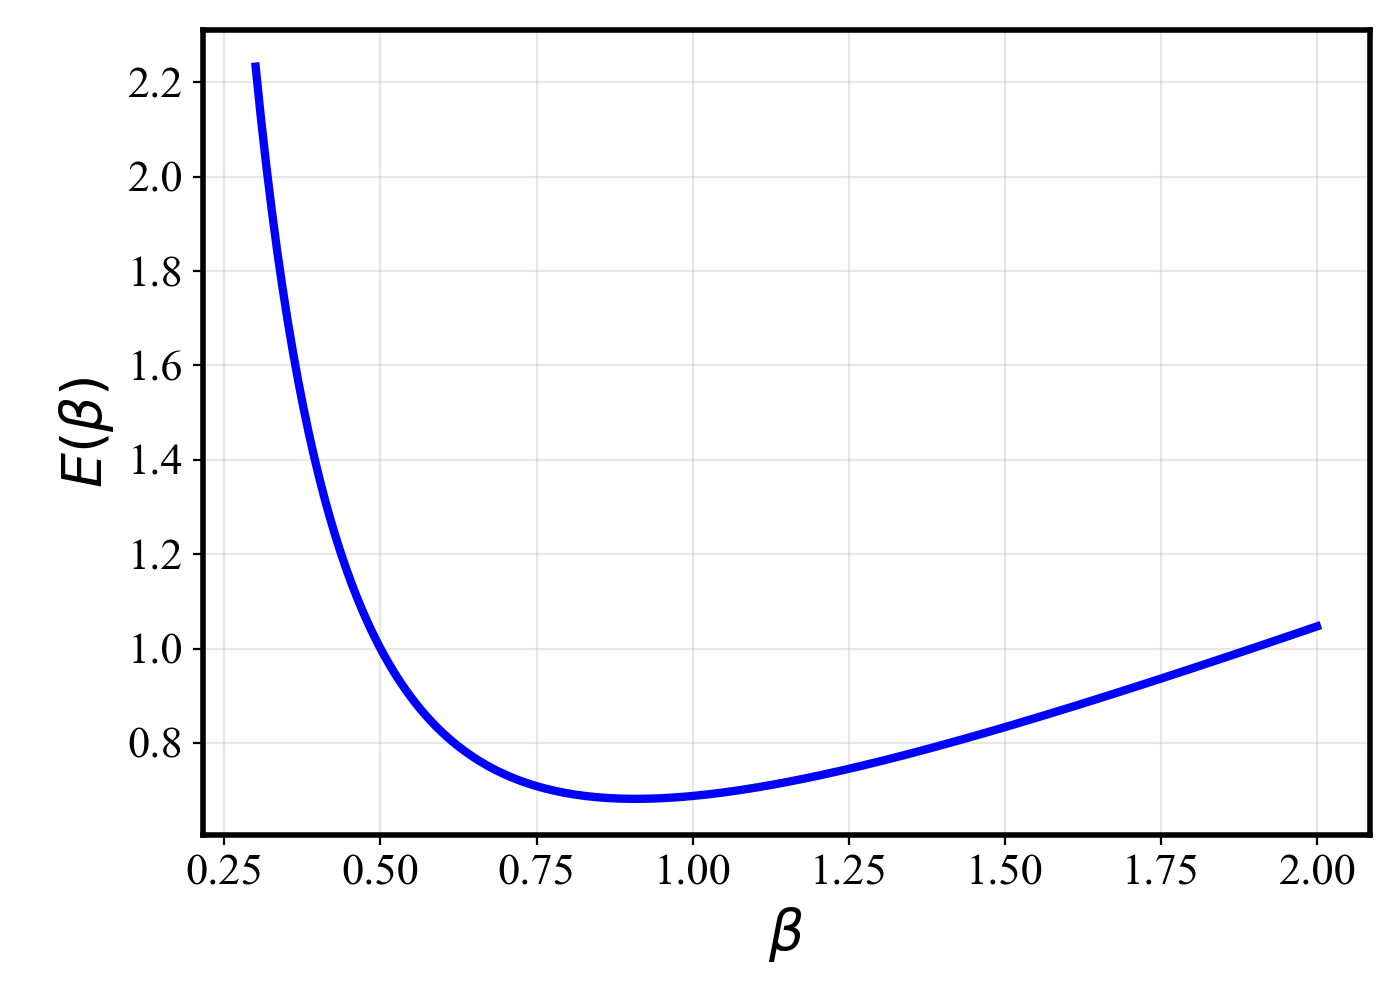

In [108]:
E_psi_lam = lambdify((beta, alpha, hbar, m), E_psi, 'numpy')
beta_range = np.linspace(0.3, 2, 200)
E_test = E_psi_lam(beta_range, 1, 1, 1)

plt.figure(figsize=(7,5))
plt.plot(beta_range, E_test, color="blue", lw=3)
plt.xlabel(r'$\beta$', fontsize=20)
plt.ylabel(r'$E(\beta)$', fontsize=20)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Der optimale Variationsparameter $\beta_{\text{opt}}$ wird bestimmt, indem die Energie $E(\beta)$ nach $\beta$ abgeleitet und die Ableitung gleich null gesetzt wird.  

Die mit *SymPy* berechnete Lösung liefert den analytischen Ausdruck für $\beta_{\text{opt}}$, der anschließend in die Testwellenfunktion eingesetzt werden kann, um die optimale Näherung für den Grundzustand zu erhalten.


In [109]:
from sympy import solve
beta_opt = solve(diff(E_psi, beta), beta)
beta_opt = simplify(beta_opt[0])
psi_opt = psi.subs({beta: beta_opt })
beta_opt

6**(1/3)*alpha**(1/3)*m**(1/3)/(2*hbar**(2/3))

In [110]:
psi_opt

exp(-6**(1/3)*alpha**(1/3)*m**(1/3)*x**2/(2*hbar**(2/3)))

In [111]:
E_psi_lam = lambdify([beta, alpha, hbar, m], E_psi)
E_psi_lam(beta_opt, alpha, hbar, m)

0.375*6**(1/3)*alpha**(1/3)*hbar**(4/3)/m**(2/3)

Als optimalen Wert von $\beta$ bekommen wir:

$$ \beta_{opt}=\sqrt[3]{\frac{3\alpha m}{4\hbar^{2}}}$$

Die variationell bestimmte Energie hat den Wert:

$$ E_{min}=\frac{3}{8}\sqrt[3]{\frac{6\alpha\hbar^{4}}{m^{2}}} $$

Wir haben damit eine **variationelle Abschätzung** für die Grundzustandsenergie des Systems erhalten und wissen nun, dass die exakte Energie unterhalb dieses Wertes liegt:

$$
0 \leq E_0 \leq \frac{3}{8}\sqrt[3]{\frac{6\alpha\hbar^{4}}{m^{2}}} .
$$

Wie gut diese Näherung tatsächlich ist, wissen wir allerdings noch nicht. Das Variationsprinzip liefert zunächst nur eine **obere Schranke** für die exakte Energie.  

Im Folgenden werden wir uns daher damit befassen, **wie sich die variationelle Abschätzung der Energie systematisch verbessern lässt**.  
Die Grundidee besteht darin, den Variationsraum schrittweise zu **erweitern**, in der Hoffnung, dass sich die berechneten Energiewerte dem exakten Wert beliebig annähern.



## Die Ritz–Galerkin-Methode

Betrachten wir zur Motivation ein Teilchen in einem beliebigen **eindimensionalen Potential**, das keine besondere Symmetrie aufweist und mehrere **Potentialmulden unterschiedlicher Tiefe** besitzen kann.  
Ein solches allgemeines Potential könnte beispielsweise wie in der folgenden Abbildung aussehen.


<IPython.core.display.Javascript object>


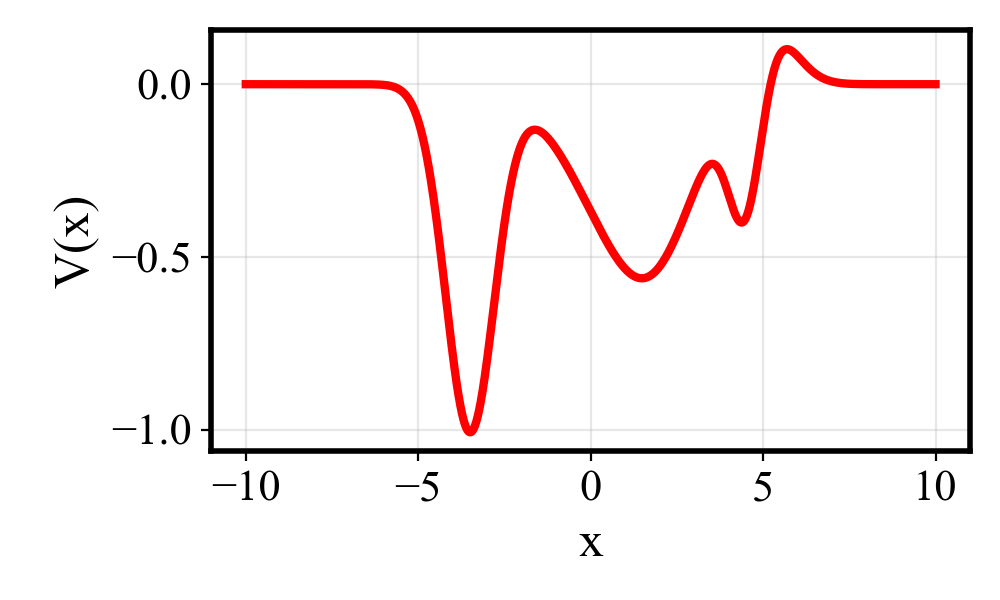

In [112]:
%matplotlib notebook
def Vgauss(x, centers=[4.5, -3.5, 1.0, 2.0, 5.0],
              widths=[2.0, 1.0, 0.2, 0.4, 0.8],
              V0=[-0.5, -1.0, -0.4, -0.2, 0.2]):
    x = np.asarray(x)
    out = np.zeros_like(x, dtype=float)
    for c, w, v in zip(centers, widths, V0):
        out += v * np.exp(-w * (x - c)**2)
    return out

x_plot = np.linspace(-10, 10, 1000)
V_plot = Vgauss(x_plot)

plt.figure(figsize=(5,3))         # create a fresh figure
plt.plot(x_plot, V_plot, 'r-', lw=3.0)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Wir wissen, dass sich ein Quantenteilchen in einem Zustand niedriger Energie bevorzugt in der Nähe eines **Potentialminimums** aufhält und in **klassisch verbotenen Bereichen** exponentiell abklingt.  
Wie lässt sich nun ein **Variationsansatz** konstruieren, der flexibel genug ist, um dieses Verhalten realistisch zu beschreiben?

Eine Möglichkeit, einen solchen Ansatz zu definieren, besteht darin, den relevanten Raum mit **Basisfunktionen fester Form** zu überdecken und den Beitrag jeder Basisfunktion durch einen **linearen Koeffizienten** zu gewichten.  
Diese Koeffizienten dienen gewissermaßen als **Stellschrauben**, die dem Ansatz die nötigeFlexibilität verleihen, um das Verhalten des Systems möglichst genau zu beschreiben.

<IPython.core.display.Javascript object>


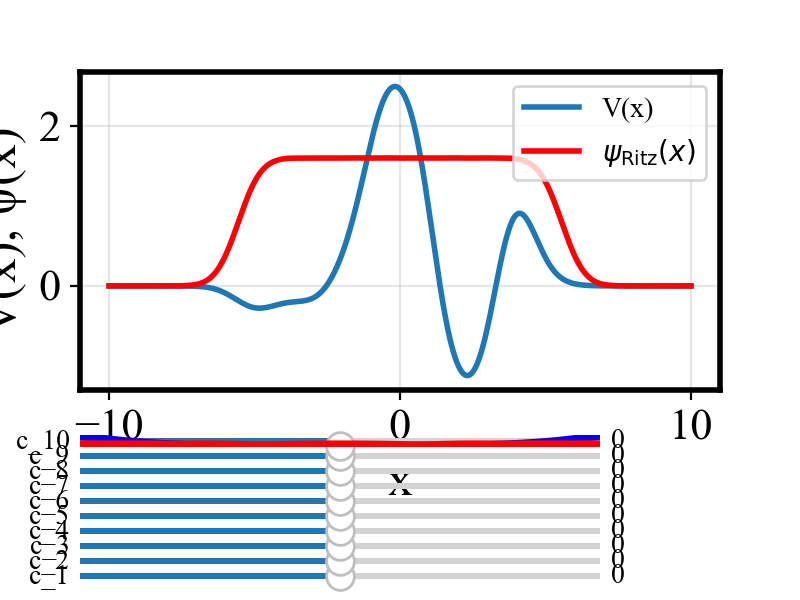

In [113]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

def Vgauss(x, centers, widths, V0):
    x = np.asarray(x)
    out = np.zeros_like(x, dtype=float)
    for c, w, v in zip(centers, widths, V0):
        out += v * np.exp(-w * (x - c)**2)
    return out

def gaussbf(x, c, w):
    x = np.asarray(x)
    return np.exp(-w * (x - c)**2)

def psi_ritz(x, coef, centers, widths):
    x = np.asarray(x)
    out = np.zeros_like(x, dtype=float)
    for a, c, w in zip(coef, centers, widths):
        out += a * gaussbf(x, c, w)
    return out

num_basis_functions = 10

fig, ax = plt.subplots(figsize=(4, 3))
plt.subplots_adjust(left=0.1, bottom=0.35)

x_plot = np.linspace(-10, 10, 1000)
potential_centers = np.linspace(-5, 5, num_basis_functions)
potential_widths = np.ones(num_basis_functions)
potential_contributions = np.random.randn(num_basis_functions)

gaussian_centers = np.linspace(-5, 5, num_basis_functions)
gaussian_widths = np.ones(num_basis_functions)
initial_coefficients = np.ones(num_basis_functions)

potential = Vgauss(x_plot, potential_centers, potential_widths, potential_contributions)
psival = psi_ritz(x_plot, initial_coefficients, gaussian_centers, gaussian_widths)

(line,)  = ax.plot(x_plot, potential, lw=2, label='V(x)')
(line1,) = ax.plot(x_plot, psival, lw=2, color="r", label=r'$\psi_{\rm Ritz}(x)$')
ax.legend()
ax.set_xlabel("x"); ax.set_ylabel("V(x), ψ(x)")
ax.grid(True, alpha=0.3)

ax_contributions = []
for i in range(num_basis_functions):
    ax_contributions.append(plt.axes([0.1, 0.03 + 0.025*i, 0.65, 0.02], facecolor=ax.get_facecolor()))

sliders_coefficients = []
for i in range(num_basis_functions):
    sliders_coefficients.append(Slider(ax_contributions[i], f'c_{i+1}', -2.0, 2.0, valinit=0.0))

def update(val):
    coefficients = [s.val for s in sliders_coefficients]
    updated_psi = psi_ritz(x_plot, coefficients, gaussian_centers, gaussian_widths)
    line1.set_ydata(updated_psi)
    fig.canvas.draw_idle()

for s in sliders_coefficients:
    s.on_changed(update)

#plt.show()


In der **Ritz–Galerkin-Methode** wird die Testwellenfunktion als **lineare Kombination fester, linear unabhängiger Basisfunktionen** dargestellt:

$$
\require{color}
\fcolorbox{red}{#f2d5d3}{$\displaystyle \psi_{\text{test}} = \sum_{i=1}^{N} c_i \, \varphi_i $}
$$

Die variablen Parameter sind die **Entwicklungskoeffizienten** $c_i$, während die $\varphi_i$ feste, von uns gewählte Basisfunktionen darstellen.  
$N$ bezeichnet die Anzahl der verwendeten Basisfunktionen. Im Grenzfall, dass die gewählte Menge $\{\varphi_i\}$ eine **vollständige Basis** bildet, konvergiert der durch das Variationsverfahren berechnete Energieeigenwert bei $N \rightarrow \infty$ gegen den **exakten** Wert. Der große Vorteil dieses **linearen Variationsverfahrens** besteht darin, dass die Optimierung der variationalen Parameter auf die Lösung **linearer Gleichungssysteme** zurückgeführt wird. Diese können mit den Methoden der **numerischen linearen Algebra** auf modernen Rechnern äußerst effizient gelöst werden. Aus diesem Grund bildet das lineare Variationsverfahren eine der **zentralen  Grundlagen** der Quantenchemie.

### Berechnung der optimalen Entwicklungskoeffizienten $c_i$ 

Mit diesem linearen Ansatz können wir ähnlich wie bei dem Beweis des Variationssatzes den Erwartungswert der Energie berechnen. 

$$ E[\psi_{test}]=\int dV\psi_{test}^{*}\hat{H}\psi_{test}=\sum_{i}\sum_{j}c_{i}^{*}c_{j}\int dV\varphi_{i}^{*}\hat{H}\varphi_{j} $$

Da die $\varphi _i$ aber in diesem Fall im Allgemeinen keine exakten Eigenfunktionen des Hamiltonoperators sind, lässt sich das Integral auf der rechten Seite nicht weiter vereinfachen. Wir führen die folgende Bezeichnung ein:

$$ H_{ij}=\int dV\varphi_{i}^{*}\hat{H}\varphi_{j}. $$

$H_{ij}$ sind die Matrixelemente des Hamilton-Operators in der gewählten Basis. 

Damit der Ansatz normiert ist, müssen die Variationsparameter $c_i$ die folgende Beziehung erfüllen:

$$ \int dV\psi_{test}^{*}\psi_{test}=1\rightarrow\sum_{i}\sum_{j}c_{i}^{*}c_{j}\left[\int dV\varphi_{i}^{*}\varphi_{j}\right]=1.  $$

Wir definieren die Überlappungmatrix $\mathbf S$ mit den Matrixelementen:

$$ S_{ij}=\int dV\varphi_{i}^{*}\varphi_{j},$$

so dass man die Normierungsbedingung auch als:

$$ \sum_{i}\sum_{j}c_{i}^{*}c_{j}S_{ij}=1 $$

ausdrücken kann. 

Der Erwartungswert der Energie lautet damit:

$$E[\psi_{test}]=\sum_{i}\sum_{j}c_{i}^{*}c_{j}H_{ij}$$

mit der Nebenbedingung:

$$ \sum_{i}\sum_{j}c_{i}^{*}c_{j}S_{ij}=1 $$

In dem allgemeinen Fall, wenn die $c$'s komplex sind, enthält die Normierungsbedingung zwei unabhängige Bedingungen, da der Realteil und der Imaginärteil beide unabhängig voneinander verschwinden müssen. Äquivalent dazu muss auch 

$$ \sum_{i}\sum_{j}c_{i}c_{j}^{*}S_{ij}^{*}=1 $$

gelten, was man leicht sieht, wenn man die Normierungsbedingung komplex konjugiert. 

Um die optimalen Werte für die $c_i$ zu bestimmen, muss der Erwartungswert minimiert werden. Da wir eine zusätzliche Nebenbedingung haben, verwenden wir für die Minimierung die Methode der Lagrange-Multiplikatoren, die aus der Mathematik bekannt ist.

Wir definieren dazu die Lagrange-Funktion:

$$\mathcal{L}(c_{1},\cdots,c_{N},\lambda)=E[\psi_{test}]-\lambda\left(\sum_{i}\sum_{j}c_{i}^{*}c_{j}S_{ij}-1\right)-\lambda^{*}\left(\sum_{i}\sum_{j}c_{i}c_{j}^{*}S_{ij}^{*}-1\right),$$

$$\mathcal{L}(c_{1},\cdots,c_{N},\lambda)=\sum_{i}\sum_{j}c_{i}^{*}c_{j}H_{ij}-\lambda\left(\sum_{i}\sum_{j}c_{i}^{*}c_{j}S_{ij}-1\right) - \lambda^{*}\left(\sum_{i}\sum_{j}c_{i}c_{j}^{*}S_{ij}^{*}-1\right)$$

Diese Funktion hängt von den $c_i$'s und den Lagrange-Multiplikatoren $\lambda$ und $\lambda^*$ ab. Da die $c_i$'s im Allgemeinen komplex sind,

$$c_{i}=a_{i}+ib_{i} \quad c_{i}^{*}=a_{i}-ib_{i} $$

können der Realteil $a_i$ und der Imaginärteil $b_i$ unabgängig voneinander variiert werden. 


Die Lagrange-Funktion $\mathcal{L}$ hat einen stationären Punkt, wenn:

$$ \frac{\partial\mathcal{L}}{\partial a_{i}}=0 \quad \forall i = 1, \cdots N $$

$$ \frac{\partial\mathcal{L}}{\partial b_{i}}=0 \quad \forall i = 1, \cdots N $$

$$ \frac{\partial\mathcal{L}}{\partial \lambda}=0 $$

und 

$$ \frac{\partial\mathcal{L}}{\partial \lambda^*}=0 $$

Die Ableitungen der Lagrange-Funktion nach dem Realteil $a_i$ und dem Imaginärteil $b_i$ kann man mit Hilfe der Kettenregel wie folgt umformen:

$$\frac{\partial\mathcal{L}}{\partial a_{i}}=\frac{\partial\mathcal{L}}{\partial c_{i}}\frac{\partial c_{i}}{\partial a_{i}}+\frac{\partial\mathcal{L}}{\partial c_{i}^{*}}\frac{\partial c_{i}^{*}}{\partial a_{i}}=\frac{\partial\mathcal{L}}{\partial c_{i}}+\frac{\partial\mathcal{L}}{\partial c_{i}^{*}}$$

$$\frac{\partial\mathcal{L}}{\partial b_{i}}=\frac{\partial\mathcal{L}}{\partial c_{i}}\frac{\partial c_{i}}{\partial b_{i}}+\frac{\partial\mathcal{L}}{\partial c_{i}^{*}}\frac{\partial c_{i}^{*}}{\partial b_{i}}=i\frac{\partial\mathcal{L}}{\partial c_{i}}-i\frac{\partial\mathcal{L}}{\partial c_{i}^{*}}$$

Aus der Stationaritätsbedingung folgt dann:

$$\frac{\partial\mathcal{L}}{\partial a_{i}}=0\rightarrow\frac{\partial\mathcal{L}}{\partial c_{i}}+\frac{\partial\mathcal{L}}{\partial c_{i}^{*}}=0$$

$$\frac{\partial\mathcal{L}}{\partial b_{i}}=0\rightarrow\frac{\partial\mathcal{L}}{\partial c_{i}}-\frac{\partial\mathcal{L}}{\partial c_{i}^{*}}=0$$

Wir berechnen im Folgenden die beiden Ableitungen explizit. Für jeden beliebigen Wert des Indexes $k$ gilt:
    
$$\frac{\partial\mathcal{L}}{\partial c_{k}^{*}}=0\rightarrow\sum_{j}c_{j}\left(H_{kj}-(\lambda+\lambda^{*})S_{kj}\right)=0\quad\forall k=1,\cdots,N $$
    
$$ \frac{\partial\mathcal{L}}{\partial c_{k}}=0\rightarrow\sum_{i}c_{i}^{*}\left(H_{ik}-(\lambda+\lambda^{*})S_{ik}\right)=0\quad\forall k=1,\cdots,N $$

Für die Matrixelemente gilt wegen der Hermitezität $ H_{jk}^{*}=H_{kj} $ und $  S_{jk}^{*}=S_{kj} $, so dass sich die zweite Bedingung einfach durch komplexe Konjugierung aus der ersten ergibt. 

Da $\lambda +\lambda^*$ reell ist, führen wir die folgende Abkürzung ein:

$$ \epsilon=\lambda+\lambda^{*} $$




Damit erhalten wir für die optimalen Variationsparameter $c$ folgendes System von **homogenen linearen Gleichungen**:

$$\require{color}\fcolorbox{red}{#f2d5d3}{$\sum_{j}\left(H_{kj}-\epsilon S_{kj}\right)c_{j}=0\quad k=1,\cdots,N$}$$

Aus der linearen Algebra wissen wir, dass ein homogenes System nur dann eine nichttriviale Lösung besitzt, wenn:

$$ \require{color}\fcolorbox{red}{#f2d5d3}{$\det\left(\mathbf{H-\epsilon\mathbf{S}}\right)=0 $}$$

Die Lösung dieser Polynom-Gleichung liefert uns die variationelle Abschätzung für die Energie der niedrigsten $N$ Zustände. 

## Beispiel: Teilchen im $V(x) = \alpha x^4$ Potential

### Systematische Verbesserung durch lineare Variation 

Wir haben am Beispiel des Teilchens im quartischen Potential eine Näherung für den Grundzustand durch Optimierung des Gaußfunktions-Ansatzes gefunden:

$$
\psi_{\text{test}}(x; \beta) = N \exp(-\beta_{\text{opt}} x^{2})
$$

Diese Näherung wollen wir nun systematisch verbessern. Da der Grundzustand eine gerade Wellenfunktion ist, genügt es, nur gerade Basisfunktionen zu betrachten.  

Wir wählen daher den folgenden Satz von \( N \) Basisfunktionen:

$$
\varphi_{n}(x) = x^{2n} \exp(-\beta_{\text{opt}} x^{2}) \quad n = 0, \ldots, N-1
$$

Aus diesen Basisfunktionen konstruieren wir den **linearen Variationsansatz**:

$$
\psi_{\text{test}}(x) = \sum_{n=0}^{N-1} c_n\, \varphi_{n}(x)
$$



Im nächsten Schritt definieren wir einige Hilfsfunktionen, mit denen die Matrixelemente der kinetischen Energie, des Potentials und der Überlappung symbolisch berechnet werden.  
Die Funktionen `Tij`, `Vij`, `Hij` und `Sij` liefern also die Integrale 

$$
T_{ij} = \langle \varphi_i | \hat{T} | \varphi_j \rangle,\quad 
V_{ij} = \langle \varphi_i | \hat{V} | \varphi_j \rangle,\quad 
H_{ij} = T_{ij} + V_{ij},\quad 
S_{ij} = \langle \varphi_i | \varphi_j \rangle,
$$

wobei die Integration über den gesamten Raum erfolgt. Damit können wir anschließend die Hamilton- und Überlappungsmatrizen symbolisch aufbauen.


In [114]:
def Tij(psi_i,psi_j):
    return simplify(integrate(psi_i*T_psi(psi_j),(x,-oo,+oo)))
def Vij(psi_i,psi_j, V):
    return simplify(integrate(psi_i*V_psi(V,psi_j),(x,-oo,+oo)))
def Hij(psi_i, psi_j, V):
    return simplify(Tij(psi_i,psi_j) + Vij(psi_i,psi_j,V))
def Sij(psi_i, psi_j):
    return simplify(integrate(psi_i*psi_j,(x,-oo,+oo)))

Im Folgenden visualisieren wir das quartische Potential zusammen mit den gewählten Basisfunktionen.  So lässt sich anschaulich erkennen, wie die Basisfunktionen den relevanten Bereich des Potentials abdecken.


In [115]:
Nbasis = 5
xrange = np.linspace(-2, 2, 400)
V_lam = lambdify((alpha, x), V, 'numpy')
vrange = V_lam(1.0, xrange)
basis = [x**(2*i)*psi_opt for i in range(Nbasis)]
basis_lam = [lambdify([alpha, m, hbar, x], b) for b in basis]

plt.plot(xrange, vrange, color="blue", linewidth=3.0)
xrange = np.linspace(-5, 5, 400)
for i in range(Nbasis):
    yrange = basis_lam[i](1, 1, 1, xrange)
    yrange /= np.max(np.abs(yrange))
    plt.plot(xrange, 0.3*yrange*np.max(vrange), color="red", linewidth=2.0)
plt.xlabel(r'$x$')
plt.ylabel(r'$V(x),\psi(x)$', fontsize=18)
plt.show()


### Berechnung der Überlappmatrix $\mathbf S$

Die Elemente der Überlappmatrix können wie folgt berechnet werden:
    
$$    S_{ij}=\int_{-\infty}^{+\infty}dx\varphi_{i}(x)\varphi_{j}(x)=\int_{-\infty}^{+\infty}dxx^{2(i+j)}\exp(-2\beta_{opt}x^{2}) $$

Das entsprechende Integral kann mit Sympy analytisch berechnet werden. Analog dazu können wir auch die Matrixelemente des Hamilton-Operators berechnen: 



In [116]:
i,j = symbols('i j', integer = True)
psi1 = (x**2*i)*psi_opt
psi2 = (x**2*j)*psi_opt
Sij(psi1,psi2)

6**(1/6)*sqrt(pi)*hbar**(5/3)*i*j/(8*alpha**(5/6)*m**(5/6))

### Berechnung der Hamiltonianmatrix $\mathbf H$

Die Elemente der Hamiltonianmatrix können analog berechnet werden als  

$$
H_{ij}=\int_{-\infty}^{+\infty}dx\,\varphi_i(x)\,
\hat H\,\varphi_j(x)
=\int_{-\infty}^{+\infty}dx\,\varphi_i(x)\!
\left[-\frac{\hbar^2}{2m}\frac{d^2}{dx^2}+V(x)\right]\!
\varphi_j(x),
$$

wobei $\hat H$ der eindimensionale Hamiltonoperator ist. Für die gewählten Basisfunktionen  $\varphi_i(x)=x^{2i}\exp(-\beta_{\mathrm{opt}}x^{2})$ ergibt sich das Integral als Linearkombination von Termen der Form  

$$
\int_{-\infty}^{+\infty}x^{2n}\exp(-2\beta_{\mathrm{opt}}x^{2})\,dx,
$$  

die mit **Sympy** analytisch berechnet  werden können.  
Damit lässt sich die Matrix $\mathbf H$ symbolisch oder numerisch aufbauen und anschließend gemeinsam mit der Überlappungsmatrix $\mathbf S$ zur Lösung der verallgemeinerten Eigenwertgleichung

$$\mathbf H\mathbf c = E\,\mathbf S\mathbf c$$

verwenden. Die Hamiltonianmatrixelemente haben damit die folgende analytische Form:


In [117]:
i,j = symbols('i j', integer = True)
psi1 = (x**2*i)*psi_opt
psi2 = (x**2*j)*psi_opt
Hij(psi1,psi2,V)

49*sqrt(6)*sqrt(pi)*hbar**3*i*j/(192*sqrt(alpha)*m**(3/2))

In [118]:
from scipy.linalg import eig
from sympy import zeros
def getEnergy(N):
    basis = [x**(2*i)*psi_opt for i in range(N)]
    S = zeros(N, N)
    H = zeros(N, N)
    for i, psi_i in enumerate(basis):
        for j , psi_j in enumerate(basis):
            H[i,j] = Hij(psi_i, psi_j, V)
            S[i,j] = Sij(psi_i, psi_j)
    H_lam = lambdify([alpha, m, hbar], H)
    S_lam = lambdify([alpha, m, hbar], S)
    HH = H_lam(1.0,1.0,1.0)
    SS = S_lam(1.0,1.0,1.0)
    u,v = eig(HH,SS)
    index_min = np.argmin(u.real)
    return min(u.real),v[:,index_min]

energies = []
wfs = []
for i in range(1,10,1):
    e,wf = getEnergy(i)
    energies.append(e)
    wfs.append(wf)
energies = np.array(energies)

In [119]:
from sympy import symbols, lambdify

alpha, m, hbar, x_sym = symbols('alpha m hbar x', real=True)

def get_psi_gs(N):
    basis_syms = [x_sym**(2*i) * psi_opt for i in range(N)]
    basis_funcs = [lambdify((alpha, m, hbar, x_sym), expr, modules='numpy')
               for expr in basis_syms]
    coeffs = wfs[N-1]
    x_grid = np.linspace(-2, 2, 1000)
    y = np.zeros_like(x_grid, dtype=float)
    for c, f in zip(coeffs, basis_funcs):
        y += c * f(1.0, 1.0, 1.0, x_grid)
    return x_grid,y

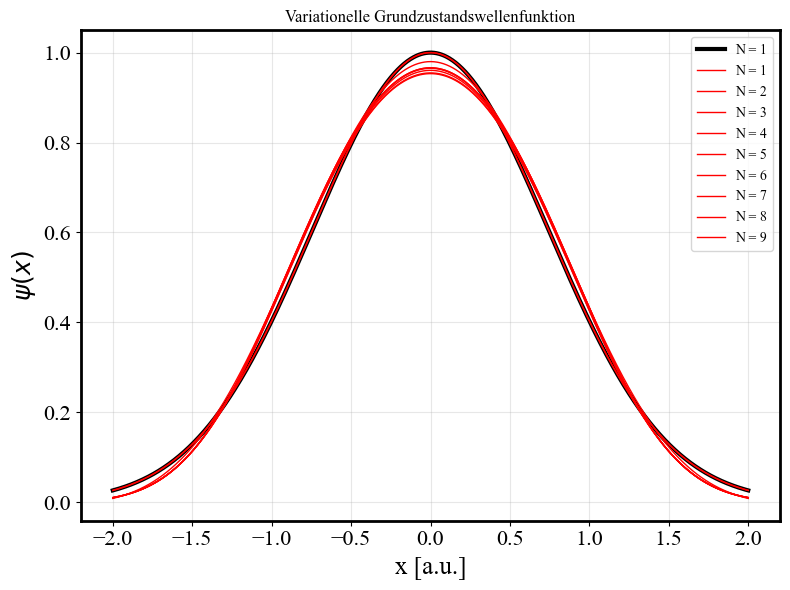

In [122]:
%matplotlib inline
N = 10
for n in range(1,N):
    x,y = get_psi_gs(n)
    if n == 1:
        plt.plot(x,np.abs(y), label= f"N = {n}", color = "black", lw = 3.0)
    plt.plot(x,np.abs(y), label= f"N = {n}", color = "red", lw = 1.0)

plt.title("Variationelle Grundzustandswellenfunktion")
plt.xlabel("x [a.u.]")
plt.ylabel(r"$\psi(x)$")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Zum Abschluss untersuchen wir, wie sich die berechnete Grundzustandsenergie mit der Größe der Basis verändert.  
Dazu wird das Ergebnis der Variationsrechnung für verschiedene Anzahlen von Basisfunktionen $N_{\text{basis}}$ dargestellt.  
Die folgende Abbildung zeigt die Konvergenz des niedrigsten Eigenwerts $E_0$ mit steigender Basisgröße. Wir sehen, dass sich das Ergebnis sehr schnell einem Grenzwert nähert und mit Vergrößerung der Basis immer besser wird!


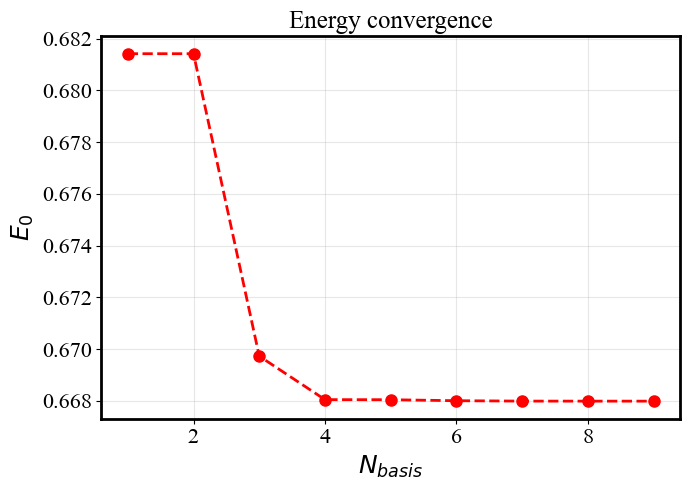

In [123]:
plt.figure(figsize=(7,5))         # create a fresh figure
plt.plot(range(1,10,1),energies,'o', c='red', markersize = 8)
plt.plot(range(1,10,1),energies,'--', c='red', lw = 2.0)
plt.xlabel(r'$N_{basis}$')
plt.ylabel(r'$E_0$')
plt.title("Energy convergence", fontsize = 18)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [125]:
print(" N_basis      E0      :")
print("---------------------------")
for N, E in zip(range(1, len(energies)+1), energies):
    print(f"   {N:2d}     {E: .6f}")


 N_basis      E0      :
---------------------------
    1      0.681420
    2      0.681420
    3      0.669726
    4      0.668044
    5      0.668042
    6      0.668003
    7      0.667988
    8      0.667986
    9      0.667986
